In [89]:
import pandas as pd
import numpy as np
from scipy.special import expit 
import seaborn as sns

In [90]:
census = pd.read_csv("C:/Bruno/CommuteCA/data-raw/make-data/Santos_released/released/census_test_v3.csv")

In [91]:
census

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,13070315,13,999,1307,172,2,57167.7000,5,3,-3,-3,-3,-3,-3,-3,-3
199996,199997,35580486,35,595,3558,2087,1,69138.3600,4,3,35580356,35,3558,595,14,5270,9
199997,199998,24320076,24,999,2432,724,2,20047.8000,5,3,-3,-3,-3,-3,-3,-3,-3
199998,199999,48060630,48,825,4806,280,2,48584.7000,4,2,-3,-3,-3,-3,-3,-3,-3


In [92]:
census['PCD'] = census['PRCDDA'].astype(str).str.slice(0, 4)

In [93]:
census['PCD']

0         3520
1         3520
2         3520
3         3520
4         3520
          ... 
199995    1307
199996    3558
199997    2432
199998    4806
199999    1006
Name: PCD, Length: 200000, dtype: object

In [94]:
census_toronto = census[census['PCD'] == '3520']

In [95]:
census_toronto

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,PWDA,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,35202127,35,3520,535,43,12951,3
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,-3,-3,-3,-3,-3,-3,-3
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,-3,-3,-3,-3,-3,-3,-3
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,-3,-3,-3,-3,-3,-3,-3
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198694,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,35240577,35,3524,535,104,37960,1
198699,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,35200218,35,3520,535,34,10115,3
199560,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,35210345,35,3521,535,85,31133,1
199573,199574,35201510,35,535,3520,448,1,44103.4000,3,1,35202699,35,3520,535,42,15523,1


In [96]:
sa_mode = pd.read_csv("C:/Bruno/CommuteCA/data-raw/make-data/Santos_released/released/SA_mode.csv")

In [97]:
sa_mode

,PRCDDA,PwMode,SA_im
0,35200002,Car/motor,56.820414
1,35200002,Transit,4.725475
2,35200003,Car/motor,66.888099
3,35200004,Car/motor,79.930028
4,35200004,Transit,4.503855
...,...,...,...
7481,35205067,Transit,0.013836
7482,35205068,Car/motor,368.313262
7483,35205068,Transit,23.385822
7484,35205069,Car/motor,499.509727


In [98]:
sa_mode_pivot = sa_mode.pivot(index='PRCDDA', columns='PwMode', values='SA_im').reset_index().fillna(0)

In [99]:
census_toronto_sa = census_toronto.merge(sa_mode_pivot, right_on= 'PRCDDA', left_on='PRCDDA', how = 'left').fillna(0)

In [100]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,...,PWPR,PWCD,PWCMA,PWDUR,PWDist,PwMode,Bike,Car/motor,Transit,Walk
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,...,35,3520,535,43,12951,3,0.000000,86.129306,38.794676,0.0
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,...,-3,-3,-3,-3,-3,-3,0.000000,102.263837,23.242284,0.0
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,...,-3,-3,-3,-3,-3,-3,0.000000,77.607235,12.219520,0.0
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,...,-3,-3,-3,-3,-3,-3,0.000000,183.917313,0.000000,0.0
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,...,-3,-3,-3,-3,-3,-3,0.000000,96.253290,11.415017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,...,35,3524,535,104,37960,1,232.086127,0.000000,0.329975,0.0
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,...,35,3520,535,34,10115,3,0.000000,311.272403,0.000000,0.0
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,...,35,3521,535,85,31133,1,0.000000,181.181602,0.000000,0.0
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,...,35,3520,535,42,15523,1,0.000000,134.700624,18.663794,0.0


For youth (15 to 24 years old) - AGE 
older adult - AGE 
women - GENDER_BINARY
low-income individuals - LOLICOA / LoLIMA
unemployed -> 
people with disabilities GovtI_SocAssist 
single-parent households - CFAMSTSIMPLE == 2 
refugees - IMMCAT5 ==  Refugees 300000
New immigrants -  PerImmA - 10 2016 to 2021
racialized populations - DVisMin 

In [101]:
census_toronto_sa['SA'] = (
    census_toronto_sa['Bike'] +
    census_toronto_sa['Car/motor'] +
    census_toronto_sa['Transit'] +
    census_toronto_sa['Walk']
)

In [102]:
maximum = 120
minimum = 1

samples = np.random.beta(a=2, b=4, size=len(census_toronto_sa))
scaled = samples * (maximum - 1) + 1
scaled = scaled.astype(int)

census_toronto_sa['AGE'] = scaled

In [103]:
census_toronto_sa

,Frame_ID,PRCDDA,Pr,CMA,PCD,CompW1,LBR_FORC,CfInc,CFCNT,CF_PnCF_NumEarners,...,PWCMA,PWDUR,PWDist,PwMode,Bike,Car/motor,Transit,Walk,SA,AGE
0,1,35200642,35,535,3520,628,1,25889.2416,4,3,...,535,43,12951,3,0.000000,86.129306,38.794676,0.0,124.923981,53
1,2,35202050,35,535,3520,1419,2,31469.4000,3,2,...,-3,-3,-3,-3,0.000000,102.263837,23.242284,0.0,125.506121,62
2,3,35203760,35,535,3520,1039,-3,197294.0000,5,4,...,-3,-3,-3,-3,0.000000,77.607235,12.219520,0.0,89.826755,64
3,4,35201706,35,535,3520,1593,2,19179.6000,4,2,...,-3,-3,-3,-3,0.000000,183.917313,0.000000,0.0,183.917313,82
4,5,35201850,35,535,3520,2137,3,140820.0000,4,2,...,-3,-3,-3,-3,0.000000,96.253290,11.415017,0.0,107.668307,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52645,198695,35203174,35,535,3520,1109,1,126453.8000,3,2,...,535,104,37960,1,232.086127,0.000000,0.329975,0.0,232.416102,35
52646,198700,35203788,35,535,3520,1591,1,70285.2768,4,3,...,535,34,10115,3,0.000000,311.272403,0.000000,0.0,311.272403,48
52647,199561,35200202,35,535,3520,1434,1,61195.2000,5,4,...,535,85,31133,1,0.000000,181.181602,0.000000,0.0,181.181602,62
52648,199574,35201510,35,535,3520,448,1,44103.4000,3,1,...,535,42,15523,1,0.000000,134.700624,18.663794,0.0,153.364418,44


In [104]:
centered = census_toronto_sa['SA'] - census_toronto_sa['SA'].median() 
prob_gender_1 = 1 - expit(-centered * 0.005) 
census_toronto_sa['GENDER_BINARY'] = np.random.binomial(1, prob_gender_1) + 1

<AxesSubplot: xlabel='GENDER_BINARY', ylabel='SA'>

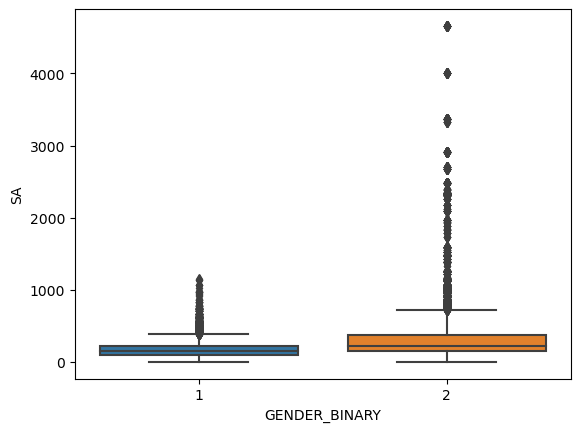

In [105]:
sns.boxplot(data=census_toronto_sa, x='GENDER_BINARY', y='SA')

In [106]:
prob_high = expit(centered * 0.006)   
prob_low = expit(-centered * 0.006)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LOLICOA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LOLICOA.append(-3)
    else:
        LOLICOA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LOLICOA'] = LOLICOA

<AxesSubplot: xlabel='LOLICOA', ylabel='SA'>

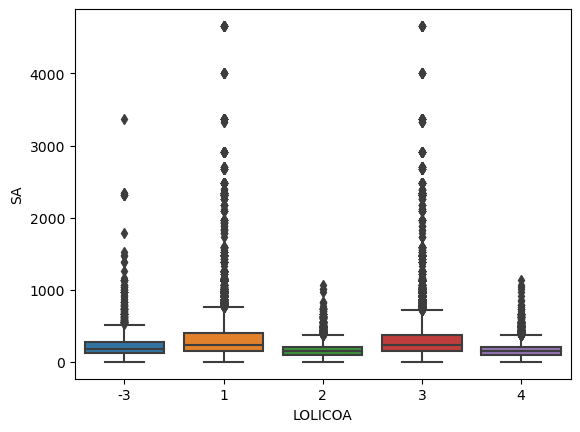

In [107]:
sns.boxplot(data=census_toronto_sa, x='LOLICOA', y='SA')

In [108]:
prob_high = expit(centered * 0.0065)   
prob_low = expit(-centered * 0.0065)

total = prob_high + prob_low + prob_high + prob_low
p1 = prob_high / total  
p2 = prob_low / total   
p3 = prob_high / total 
p4 = prob_low / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_3 = 0.03

is_minus_3 = np.random.rand(n) < prob_minus_3

LoLIMA = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_3[i]:
        LoLIMA.append(-3)
    else:
        LoLIMA.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['LoLIMA'] = LoLIMA

<AxesSubplot: xlabel='LoLIMA', ylabel='SA'>

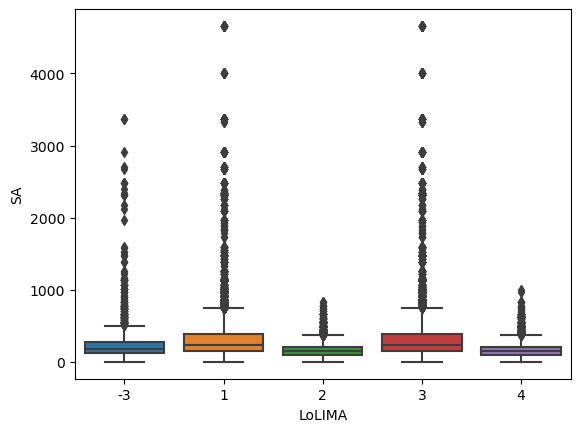

In [109]:
sns.boxplot(data=census_toronto_sa, x='LoLIMA', y='SA')

In [110]:
prob_high = expit(centered * 0.0070)   
prob_middle = expit(centered * 0.0045)   
prob_low = expit(-centered * 0.0003)

total = prob_high + prob_low + prob_middle + prob_low
p1 = prob_low / total  
p2 = prob_low / total   
p3 = prob_middle / total 
p4 = prob_high / total   

probs = np.vstack([p1, p2, p3, p4]).T  

n = len(census_toronto_sa)
prob_minus_2 = 0.02

is_minus_2 = np.random.rand(n) < prob_minus_2

ACTLMFLG = []

choices_core = [1, 2, 3, 4]

for i in range(n):
    if is_minus_2[i]:
        ACTLMFLG.append(-2)
    else:
        ACTLMFLG.append(np.random.choice(choices_core, p=probs[i]))

census_toronto_sa['ACTLMFLG'] = ACTLMFLG

<AxesSubplot: xlabel='ACTLMFLG', ylabel='SA'>

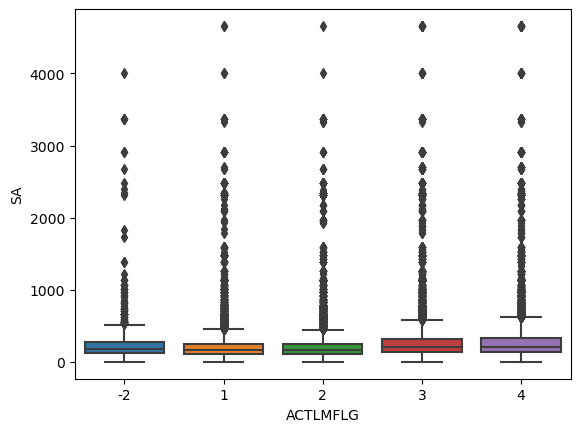

In [111]:
sns.boxplot(data=census_toronto_sa, x='ACTLMFLG', y='SA')

In [112]:
centered = census_toronto_sa['SA'] - census_toronto_sa['SA'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['CFAMSTSIMPLE'] = np.random.binomial(1, prob_gender_1) + 1

<AxesSubplot: xlabel='CFAMSTSIMPLE', ylabel='SA'>

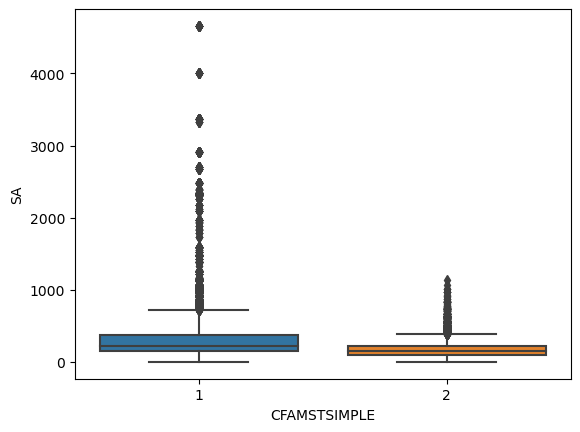

In [113]:
sns.boxplot(data=census_toronto_sa, x='CFAMSTSIMPLE', y='SA')

In [114]:
centered = census_toronto_sa['SA'] - census_toronto_sa['SA'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['IMMCAT5'] = np.random.binomial(1, prob_gender_1) + 1
census_toronto_sa.loc[census_toronto_sa['IMMCAT5'] == 2, 'IMMCAT5'] = 300000

<AxesSubplot: xlabel='IMMCAT5', ylabel='SA'>

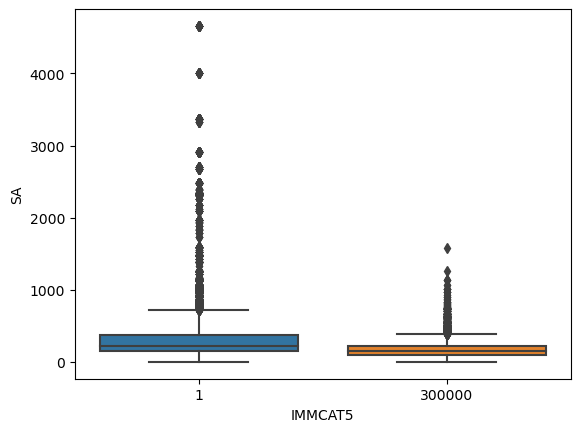

In [115]:
sns.boxplot(data=census_toronto_sa, x='IMMCAT5', y='SA')

In [116]:
centered = census_toronto_sa['SA'] - census_toronto_sa['SA'].median() 
prob_gender_1 = 1 - expit(centered * 0.005) 
census_toronto_sa['PerImmA'] = np.random.binomial(1, prob_gender_1) + 1
census_toronto_sa.loc[census_toronto_sa['PerImmA'] == 2, 'PerImmA'] = 10

<AxesSubplot: xlabel='PerImmA', ylabel='SA'>

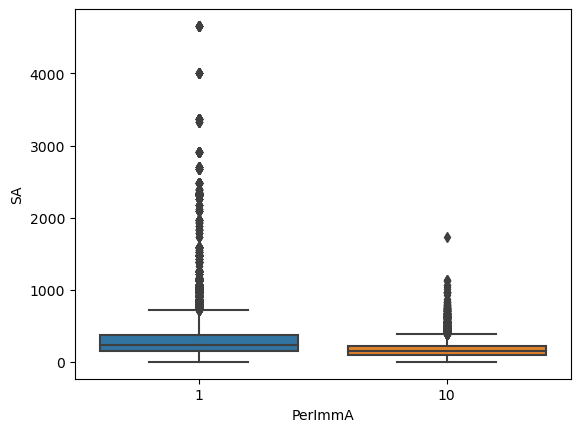

In [117]:
sns.boxplot(data=census_toronto_sa, x='PerImmA', y='SA')

In [118]:
centered = census_toronto_sa['SA'] - census_toronto_sa['SA'].mean()

scale = 0.0065

high_prob = expit(centered * scale)
low_prob = expit(-centered * scale)
neutral_prob = np.full_like(high_prob, 0.5) 


high_SA_groups = [1,10,11]
low_SA_groups = [4,7,9,12,13,14]
mixed_groups = [2,3,5,6,8]

all_groups = high_SA_groups + low_SA_groups + mixed_groups

prob_matrix = []

for i in range(len(census_toronto_sa)):
    row_probs = []
    for group in all_groups:
        if group in high_SA_groups:
            row_probs.append(high_prob[i])
        elif group in low_SA_groups:
            row_probs.append(low_prob[i])
        else:  
            row_probs.append(neutral_prob[i])
   
    row_probs = np.array(row_probs)
    row_probs /= row_probs.sum()
    prob_matrix.append(row_probs)

DVisMin = [np.random.choice(all_groups, p=probs) for probs in prob_matrix]

census_toronto_sa['DVisMin'] = DVisMin

<AxesSubplot: xlabel='DVisMin', ylabel='SA'>

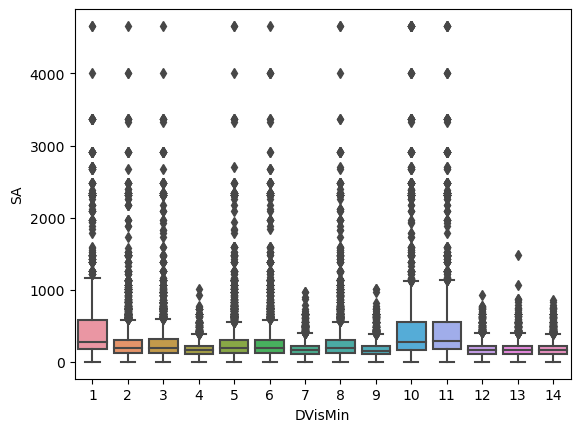

In [119]:
sns.boxplot(data=census_toronto_sa, x='DVisMin', y='SA')

In [120]:
census_toronto_sa.to_csv("C:/Bruno/CommuteCA/data-raw/make-data/census_test_toronto.csv", index=False)